In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 88s 5us/step


In [3]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
print(train_labels[0])

1


In [5]:
# word_index は単語の整数のインデックスにマッピングする辞書
word_index = imdb.get_word_index()

# 整数のインデックスを単語にマッピング
reverse_word_index = dict(
        [(value, key) for (key, value) in word_index.items()])

# レビューをデコード
decoded_review = ' '.join(
            [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

#デコードしたレビューの内容を表示
print(decoded_review)

1646592/1641221 [==============================] - 4s 2us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

In [23]:
# データの準備 one-hotエンコーディングを使ってベクトルに変換する
import numpy as np

def vectorixe_sequences(sequences, dimension=10000):
    
    # 形状が(len(sequences), dimension)の行列を作成して０で埋める
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # results[i]のインデックスを１に設定
    return results

In [24]:
# 訓練データのベクトル化
x_train = vectorixe_sequences(train_data)
# テストデータのベクトル化
x_test = vectorixe_sequences(test_data)

In [8]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [9]:
# ラベルのベクトル化
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
from keras import models
from keras import layers

In [25]:
# モデルの定義
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [26]:
model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

In [27]:
# 検証データセットの設定
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [28]:
model.compile(optimizer='rmsprop',
                             loss='binary_crossentropy',
                             metrics=['acc'])

history = model.fit(partial_x_train,
                                partial_y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 355us/step - loss: 0.5115 - acc: 0.7846 - val_loss: 0.3785 - val_acc: 0.8730
Epoch 2/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.2983 - acc: 0.9058 - val_loss: 0.3010 - val_acc: 0.8903
Epoch 3/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.2179 - acc: 0.9297 - val_loss: 0.2948 - val_acc: 0.8819
Epoch 4/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.1690 - acc: 0.9467 - val_loss: 0.2775 - val_acc: 0.8883
Epoch 5/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.1398 - acc: 0.9570 - val_loss: 0.3015 - val_acc: 0.8843
Epoch 6/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.1149 - acc: 0.9654 - val_loss: 0.3272 - val_acc: 0.8746
Epoch 7/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.0946 - acc: 0.9727 - val_loss: 0.3139 - 

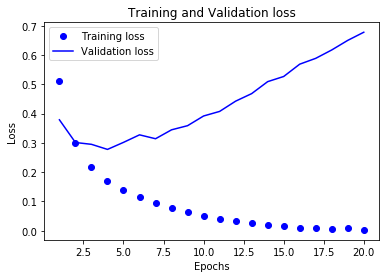

In [29]:
# 訓練データと検証データでの損失値をプロット
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [30]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 2s 93us/step - loss: 0.4502 - acc: 0.8178
Epoch 2/4
25000/25000 [==============================] - 2s 77us/step - loss: 0.2532 - acc: 0.9105
Epoch 3/4
25000/25000 [==============================] - 2s 77us/step - loss: 0.1968 - acc: 0.9291
Epoch 4/4
25000/25000 [==============================] - 5s 182us/step
[0.3317440266656876, 0.87108]


In [31]:
model.predict(x_test)

array([[0.12165522],
       [0.99976295],
       [0.51743364],
       ...,
       [0.07357541],
       [0.03813014],
       [0.48189443]], dtype=float32)